# 라이브러리

In [ ]:
!pip install koreanize-matplotlib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 20.9 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import koreanize_matplotlib
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# 데이터 불러오기

In [ ]:
data = pd.read_csv("/content/의료데이터 총합본 Ver2.csv")
data.head()

,시도,시군구,의료보장,근 로 자,공ㆍ교,지 역,의료급여 1종,의료급여 2종,0-4세,5-9세,...,예방치과,예방의학과,결핵과,구강병리과,비뇨의학과,영상치의학과,심장혈관흉부외과,통합치의학과,한방안·이비인후·피부과,미충족 의료율
0,강원특별자치도,강릉시,213001,113657,23134,68749,5990,1471,4744,6721.0,...,0.0,0.0,0.0,0.0,4.0,0.0,2.0,0.0,0.0,7.4
1,강원특별자치도,동해시,89660,48009,13090,25359,2615,587,2132,3312.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.6
2,강원특별자치도,삼척시,63575,35274,6434,19268,2122,477,1479,1717.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.6
3,강원특별자치도,소계,1553457,811143,199878,489005,43180,10251,38725,52487.0,...,2.0,0.0,0.0,0.0,10.0,1.0,7.0,3.0,4.0,7.4
4,강원특별자치도,속초시,83693,40676,11262,28192,2823,740,2045,3034.0,...,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,3.0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 235 entries, 0 to 234
Columns: 108 entries, 시도 to 미충족 의료율
dtypes: float64(53), int64(53), object(2)
memory usage: 198.4+ KB


## 연령 합치기


In [ ]:
temp = data.copy()
temp[['0-4세','5-9세','10-14세','15-19세','20-24세','25-29세','30-34세','35-39세']]

,0-4세,5-9세,10-14세,15-19세,20-24세,25-29세,30-34세,35-39세
0,4744,6721.0,8455,9173,11558,11977,10684,10384
1,2132,3312.0,4147,4140,4214,4506,4173,4331
2,1479,1717.0,2198,2616,4083,2730,2508,2593
3,38725,52487.0,63447,66370,82968,87910,84279,79891
4,2045,3034.0,3465,3383,4057,4701,4783,4527
...,...,...,...,...,...,...,...,...
230,2774,4312.0,5222,6018,7897,6817,6037,6059
231,1061,1591.0,1792,1607,1838,2584,2442,2323
232,2847,4072.0,4507,4268,4391,6194,6749,6728
233,26390,38111.0,43395,41970,51645,65577,64077,59157


In [ ]:
data['0-9세'] = data['0-4세'] + data['5-9세']

# 10~19세 = 10~14세 + 15~19세
data['10-19세'] = data['10-14세'] + data['15-19세']

# 20~29세 = 20~24세 + 25~29세
data['20-29세'] = data['20-24세'] + data['25-29세']

# 30~39세 = 30~34세 + 35~39세
data['30-39세'] = data['30-34세'] + data['35-39세']

# 40~49세 = 40~44세 + 45~49세
data['40-49세'] = data['40-44세'] + data['45-49세']

# 50~59세 = 50~54세 + 55~59세
data['50-59세'] = data['50-54세'] + data['55-59세']

# 60~69세 = 60~64세 + 65~69세
data['60-69세'] = data['60-64세'] + data['65-69세']

# 70~79세 = 70~74세 + 75~79세
data['70-79세'] = data['70-74세'] + data['75-79세']

# 80세 이상 그대로 유지

# 합친 후 기존 칼럼 삭제
columns_to_drop = [
    '0-4세', '5-9세', '10-14세', '15-19세', '20-24세', '25-29세',
    '30-34세', '35-39세', '40-44세', '45-49세', '50-54세', '55-59세',
    '60-64세', '65-69세', '70-74세', '75-79세',''
]
data = data.drop(columns=columns_to_drop, errors='ignore')

In [ ]:
data

,시도,시군구,의료보장,근 로 자,공ㆍ교,지 역,의료급여 1종,의료급여 2종,80세 이상,병원 총계,...,한방안·이비인후·피부과,미충족 의료율,0-9세,10-19세,20-29세,30-39세,40-49세,50-59세,60-69세,70-79세
0,강원특별자치도,강릉시,213001,113657,23134,68749,5990,1471,13469,368,...,0.0,7.4,11465.0,17628,23535,21068,30095,37160,37649,20932
1,강원특별자치도,동해시,89660,48009,13090,25359,2615,587,5161,141,...,0.0,3.6,5444.0,8287,8720,8504,13393,16125,15471,8555
2,강원특별자치도,삼척시,63575,35274,6434,19268,2122,477,5184,92,...,0.0,4.6,3196.0,4814,6813,5101,7962,10957,12318,7230
3,강원특별자치도,소계,1553457,811143,199878,489005,43180,10251,97188,2657,...,4.0,7.4,91212.0,129817,170878,164170,212295,266802,278723,142372
4,강원특별자치도,속초시,83693,40676,11262,28192,2823,740,4411,169,...,0.0,3.0,5079.0,6848,8758,9310,11866,15152,15000,7269
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
230,충청북도,제천시,132670,75528,10083,41963,4213,883,8505,248,...,1.0,10.7,7086.0,11240,14714,12096,16694,23474,25491,13370
231,충청북도,증평군,38381,21984,4146,11077,992,182,1983,70,...,0.0,11.8,2652.0,3399,4422,4765,5637,6464,6025,3034
232,충청북도,진천군,95146,63315,4349,25592,1520,370,4509,138,...,0.0,7.7,6919.0,8775,10585,13477,15688,15755,13326,6112
233,충청북도,청주시,874388,557763,70043,226397,15697,4488,32067,1527,...,7.0,7.9,64501.0,85365,117222,123234,137566,144776,117051,52606


In [ ]:
categories = {
    "내과 계열": [
        '내과', '신경과', '소아청소년과', '재활의학과', '가정의학과', '정신건강의학과'
    ],
    "외과 계열": [
        '외과', '정형외과', '신경외과', '심장혈관흉부외과', '산부인과', '성형외과', '비뇨의학과', '마취통증의학과'
    ],
    "진단/검사": [
        '영상의학과', '진단검사의학과', '핵의학과', '방사선종양학과', '병리과', '직업환경의학과'
    ],
    "한방 관련": [
        '한방신경정신과', '한방재활의학과', '한방내과', '한방부인과', '사상체질과', '침구과', '한방소아과',
        '한방안·이비인후·피부과'
    ],
    "치과 계열": [
        '치과보철과', '치과보존과', '치주과', '치과교정과', '소아치과', '구강악안면외과', '구강내과',
        '예방치과', '통합치의학과', '구강병리과', '영상치의학과'
    ],
    "기타 계열": [
        '안과', '이비인후과', '피부과', '응급의학과', '결핵과', '예방의학과'
    ]
}

# 새로운 카테고리 열 추가
for category, columns in categories.items():
    data[category] = data[columns].sum(axis=1)

# 기존 45개 진료과목 열 삭제
columns_to_drop = [col for cols in categories.values() for col in cols]
data.drop(columns=columns_to_drop, inplace=True)

data

,시도,시군구,의료보장,근 로 자,공ㆍ교,지 역,의료급여 1종,의료급여 2종,80세 이상,병원 총계,...,40-49세,50-59세,60-69세,70-79세,내과 계열,외과 계열,진단/검사,한방 관련,치과 계열,기타 계열
0,강원특별자치도,강릉시,213001,113657,23134,68749,5990,1471,13469,368,...,30095,37160,37649,20932,21.0,28.0,12.0,4.0,8.0,12.0
1,강원특별자치도,동해시,89660,48009,13090,25359,2615,587,5161,141,...,13393,16125,15471,8555,0.0,2.0,0.0,0.0,0.0,0.0
2,강원특별자치도,삼척시,63575,35274,6434,19268,2122,477,5184,92,...,7962,10957,12318,7230,6.0,11.0,3.0,2.0,1.0,1.0
3,강원특별자치도,소계,1553457,811143,199878,489005,43180,10251,97188,2657,...,212295,266802,278723,142372,190.0,197.0,59.0,74.0,47.0,49.0
4,강원특별자치도,속초시,83693,40676,11262,28192,2823,740,4411,169,...,11866,15152,15000,7269,12.0,16.0,5.0,3.0,7.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
230,충청북도,제천시,132670,75528,10083,41963,4213,883,8505,248,...,16694,23474,25491,13370,24.0,24.0,9.0,13.0,2.0,3.0
231,충청북도,증평군,38381,21984,4146,11077,992,182,1983,70,...,5637,6464,6025,3034,2.0,0.0,0.0,1.0,0.0,0.0
232,충청북도,진천군,95146,63315,4349,25592,1520,370,4509,138,...,15688,15755,13326,6112,4.0,5.0,2.0,1.0,0.0,1.0
233,충청북도,청주시,874388,557763,70043,226397,15697,4488,32067,1527,...,137566,144776,117051,52606,118.0,93.0,32.0,65.0,25.0,30.0


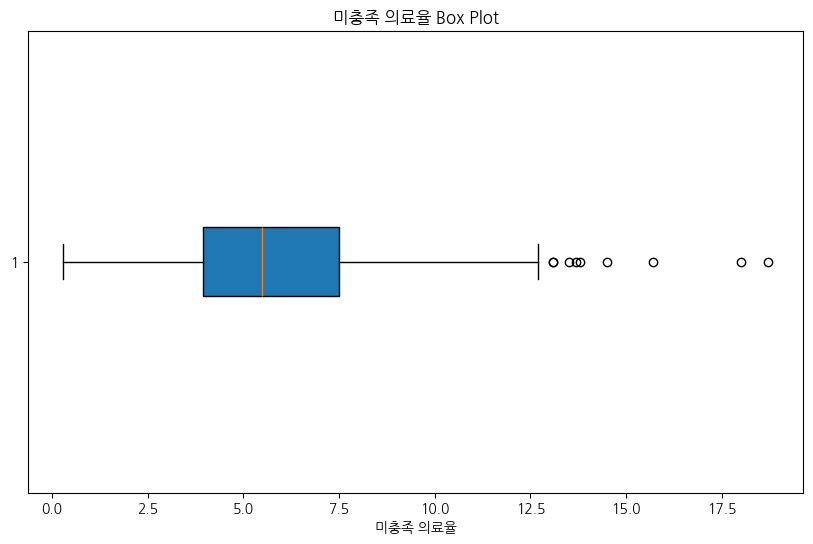

총 데이터 수: 235
이상치 데이터 수: 9
나머지 데이터 수: 226


In [ ]:
# 박스 플롯 그리기
plt.figure(figsize=(10, 6))
plt.boxplot(data['미충족 의료율'], vert=False, patch_artist=True)
plt.title('미충족 의료율 Box Plot')
plt.xlabel('미충족 의료율')
plt.show()

# IQR을 사용한 이상치 정의
Q1 = data['미충족 의료율'].quantile(0.25)  # 1분위수
Q3 = data['미충족 의료율'].quantile(0.75)  # 3분위수
IQR = Q3 - Q1  # 사분위 범위

# 이상치 범위 계산
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# 이상치 데이터 분리
outliers = data[(data['미충족 의료율'] < lower_bound) | (data['미충족 의료율'] > upper_bound)]
remaining = data[(data['미충족 의료율'] >= lower_bound) & (data['미충족 의료율'] <= upper_bound)]

outliers = outliers.reset_index(drop=True)
remaining = remaining.reset_index(drop=True)

# 결과 확인
print(f"총 데이터 수: {len(data)}")
print(f"이상치 데이터 수: {len(outliers)}")
print(f"나머지 데이터 수: {len(remaining)}")


In [ ]:
outliers

,시도,시군구,의료보장,근 로 자,공ㆍ교,지 역,의료급여 1종,의료급여 2종,80세 이상,병원 총계,...,40-49세,50-59세,60-69세,70-79세,내과 계열,외과 계열,진단/검사,한방 관련,치과 계열,기타 계열
0,강원특별자치도,인제군,32358,11706,9542,10207,783,120,2017,42,...,3949,4903,6158,2772,1.0,3.0,0.0,0.0,0.0,1.0
1,강원특별자치도,춘천시,291274,152975,45346,81812,8790,2351,16135,512,...,41507,47694,45075,22086,52.0,35.0,13.0,24.0,4.0,10.0
2,강원특별자치도,평창군,41425,20312,3328,16798,848,139,3429,79,...,4603,7772,10205,5346,3.0,2.0,0.0,0.0,0.0,0.0
3,경기도,동두천시,90852,48633,6547,31188,3881,603,5984,134,...,12547,16385,15208,8649,27.0,21.0,1.0,11.0,0.0,5.0
4,경상남도,김해시,556469,358774,31650,151193,11405,3447,15650,763,...,95143,105586,72726,30149,199.0,158.0,41.0,157.0,77.0,58.0
5,경상남도,남해군,41492,20348,3381,16192,1287,284,6008,88,...,3999,6787,9018,6585,7.0,4.0,1.0,1.0,0.0,1.0
6,경상북도,경산시,278202,161418,20128,88119,6679,1858,12646,458,...,40403,47336,40639,21750,77.0,55.0,9.0,25.0,27.0,15.0
7,울산광역시,동구,159075,115693,4470,35533,2446,933,3673,243,...,28187,25063,25165,10577,15.0,18.0,8.0,15.0,12.0,9.0
8,충청북도,보은군,31786,16628,2286,11643,1076,153,3959,74,...,2951,5414,7784,4530,4.0,7.0,0.0,3.0,0.0,0.0


In [ ]:
remaining

,시도,시군구,의료보장,근 로 자,공ㆍ교,지 역,의료급여 1종,의료급여 2종,80세 이상,병원 총계,...,40-49세,50-59세,60-69세,70-79세,내과 계열,외과 계열,진단/검사,한방 관련,치과 계열,기타 계열
0,강원특별자치도,강릉시,213001,113657,23134,68749,5990,1471,13469,368,...,30095,37160,37649,20932,21.0,28.0,12.0,4.0,8.0,12.0
1,강원특별자치도,동해시,89660,48009,13090,25359,2615,587,5161,141,...,13393,16125,15471,8555,0.0,2.0,0.0,0.0,0.0,0.0
2,강원특별자치도,삼척시,63575,35274,6434,19268,2122,477,5184,92,...,7962,10957,12318,7230,6.0,11.0,3.0,2.0,1.0,1.0
3,강원특별자치도,소계,1553457,811143,199878,489005,43180,10251,97188,2657,...,212295,266802,278723,142372,190.0,197.0,59.0,74.0,47.0,49.0
4,강원특별자치도,속초시,83693,40676,11262,28192,2823,740,4411,169,...,11866,15152,15000,7269,12.0,16.0,5.0,3.0,7.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
221,충청북도,제천시,132670,75528,10083,41963,4213,883,8505,248,...,16694,23474,25491,13370,24.0,24.0,9.0,13.0,2.0,3.0
222,충청북도,증평군,38381,21984,4146,11077,992,182,1983,70,...,5637,6464,6025,3034,2.0,0.0,0.0,1.0,0.0,0.0
223,충청북도,진천군,95146,63315,4349,25592,1520,370,4509,138,...,15688,15755,13326,6112,4.0,5.0,2.0,1.0,0.0,1.0
224,충청북도,청주시,874388,557763,70043,226397,15697,4488,32067,1527,...,137566,144776,117051,52606,118.0,93.0,32.0,65.0,25.0,30.0


In [ ]:
# 데이터셋 분리 저장 (선택 사항)
outliers.to_csv('의료 test.csv', index=False, encoding='utf-8-sig')
remaining.to_csv('의료 train.csv', index=False, encoding='utf-8-sig')

# EDA 및 시각화

In [ ]:
remaining.columns

Index(['시도', '시군구', '의료보장', '근 로 자', '공ㆍ교', '지 역', '의료급여 1종', '의료급여 2종',
       '80세 이상', '병원 총계', '상급종합병원', '종합병원', '병      원', '요양병원', '정신병원',
       '의      원', '치과병원', '치과의원', '한방병원', '한  의  원', '약      국', '보건소',
       '의료진 총계', '의        사', '치 과 의 사', '한    의    사', '간호사', '약  사',
       '한 약 사', '물리치료사', '작업치료사', '사회복지사', '일반입원실 ', '중환자실  ', '자기공명영상기',
       '전산화단층촬영장치', '초음파', '진료실인원수(계)', '진료비(계)', '급여비(계', '진료실인원수(관내)',
       '진료비(관내)', '급여비(관내)', '진료실인원수(관외)', '진료비(관외)', '급여비(관외)', '미충족 의료율',
       '0-9세', '10-19세', '20-29세', '30-39세', '40-49세', '50-59세', '60-69세',
       '70-79세', '내과 계열', '외과 계열', '진단/검사', '한방 관련', '치과 계열', '기타 계열'],
      dtype='object')

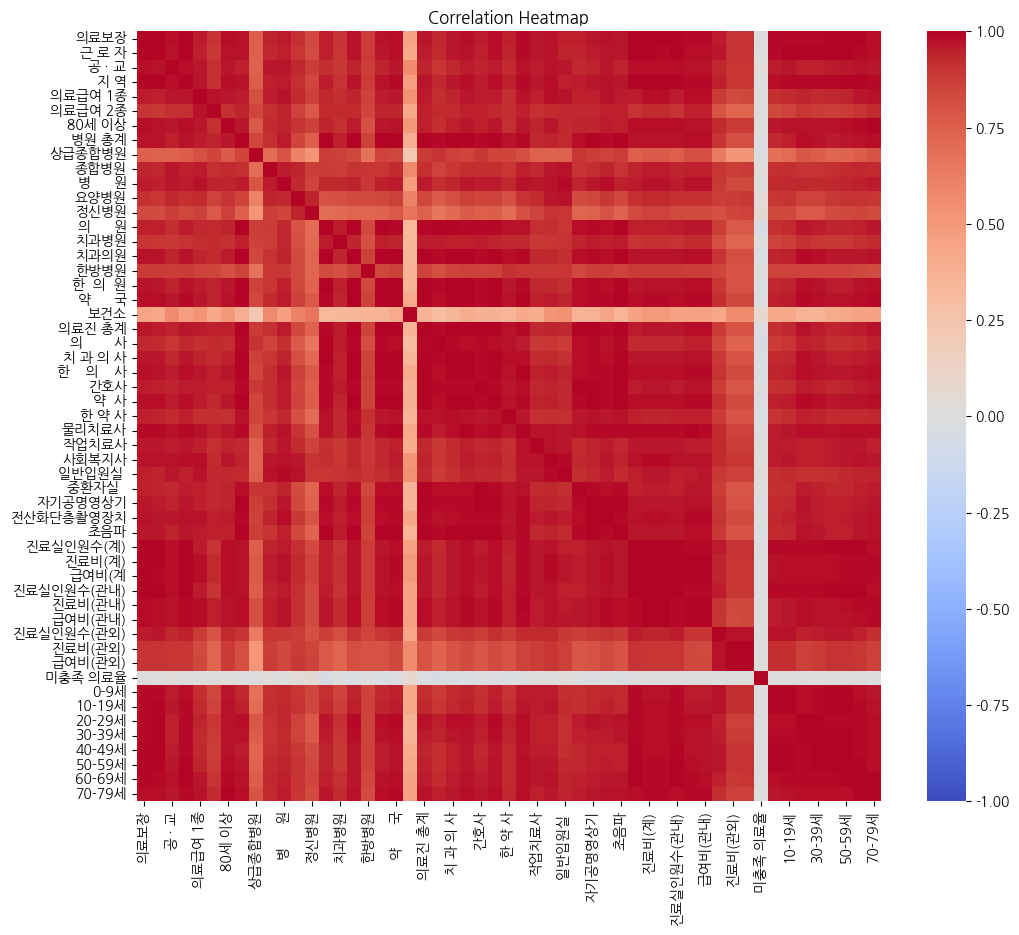

In [ ]:
y_columns = [
     '내과 계열', '외과 계열', '진단/검사', '한방 관련', '치과 계열', '기타 계열'
]

# 행을 구분하기 위한 열 이름
columns_to_exclude = ['시도', '시군구']

# y값과 행 구분 열 제외한 x 데이터 추출
x_data = data.drop(columns=y_columns + columns_to_exclude, errors='ignore')

# 상관관계 행렬 계산
correlation_matrix = x_data.corr()
correlation_matrix

# 상관관계 히트맵 시각화
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap')
plt.show()